<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_B_augmentation_r_squared_jul_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image
from sklearn.metrics import r2_score

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 8.1MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 202.49 MiB | 28.40 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 7.67 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     173  136.032104  135.526520  ...  113.509865  108.506096  108.751938
1     175   64.631996   71.256004  ...  126.796791  112.961594   95.508789
2     185  112.722061  124.327148  ...  136.917953  137.842987  136.229370
3     185  194.708801  157.562515  ...  187.278259  205.118271  172.416855
4     113  186.488922  180.061295  ...  118.307465  119.903831  118.914719
5     126  109.592590  108.802467  ...  128.370361  130.481476  132.259262
6     180  124.392593  129.398529  ...  149.203461  136.563950  150.416321
7     113  105.986847   98.876511  ...  149.873825  153.521805  154.920959
8     140  110.879997  109.399994  ...   50.279999   62.840000   45.119999
9     140  199.479996  209.799988  ...  114.959999  129.879990  137.639999
10    129  127.934380  129.951813  ...  200.378693  208.210815  202.750565
11    143  147.429688  173.579453  ...  184.624924  102.251801  125.684731
12    162  123.234566  12

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 46s 17ms/step - loss: 0.6827 - accuracy: 0.6075
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.3739 - accuracy: 0.8293
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.9294
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9631
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9828
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9840
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9946
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9993
Epoch 1

In [17]:

# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 5
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=200)

Epoch 1/200
68/68 [==============================] - 2s 17ms/step - loss: 0.8081 - accuracy: 0.6065 - val_loss: 15.4351 - val_accuracy: 0.5102
Epoch 2/200
68/68 [==============================] - 0s 5ms/step - loss: 0.5892 - accuracy: 0.7189 - val_loss: 8.9320 - val_accuracy: 0.5102
Epoch 3/200
68/68 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.7012 - val_loss: 13.6313 - val_accuracy: 0.5102
Epoch 4/200
68/68 [==============================] - 0s 5ms/step - loss: 0.5635 - accuracy: 0.8254 - val_loss: 27.4758 - val_accuracy: 0.5102
Epoch 5/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.8314 - val_loss: 32.8097 - val_accuracy: 0.5102
Epoch 6/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.8876 - val_loss: 33.2896 - val_accuracy: 0.5102
Epoch 7/200
68/68 [==============================] - 0s 6ms/step - loss: 0.4062 - accuracy: 0.8817 - val_loss: 15.9340 - val_accuracy: 0.5102
Epoch 

In [18]:
# X_train.shape
steps_per_epoch

68

In [19]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9971
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9971
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9971
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 11/

In [20]:
Y_test = yback(Y_test)

In [21]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        68   4
1         2  73


In [22]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [23]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
2   110.0   75.473053   76.030411  ...   32.605618   33.027107   35.333221
5   194.0  130.847168  132.532135  ...   54.409924   44.967159   29.347006
8   134.0  144.090454  142.638901  ...   68.534416   61.687458   60.067497
9   195.0   71.041977   84.708199  ...   74.042374   75.499207   75.105240
12  160.0   99.181870   98.168747  ...    7.008750    3.735000    1.103125
13  148.0   64.582916   65.488678  ...   37.293644   35.994888   37.498905
14  118.0   94.796318   95.415115  ...   55.293304   49.029873   40.695488
15  150.0  107.920708  107.651558  ...    0.610133    0.317511    0.000000
18  116.0   79.747917   77.019020  ...   66.771698   67.416168   73.161713
20  164.0   80.077332   74.550865  ...   60.543129   59.400955   57.758480
26  133.0  143.548477  159.731293  ...   95.595573   98.468140  101.066483
27  194.0  105.766388  106.628113  ...  107.786575  110.362732  102.603775
28  104.0  113.807701  11

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
Width=np.array(Width_new)

In [25]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 608, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (368/368), done.
remote: Total 608 (delta 227), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (608/608), 5.20 MiB | 14.10 MiB/s, done.
Resolving deltas: 100% (364/364), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [26]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 4.00 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [27]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [28]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,110.0,75.473053,76.030411,73.175201,70.941162,67.378510,64.454880,64.446609,63.617519,63.470081,63.538837,65.595039,65.200989,65.887268,72.753387,78.546448,80.297844,76.209908,67.651230,55.898506,40.471077,29.651237,26.339500,24.533884,24.026117,24.019505,23.228098,22.069422,19.791737,76.083305,76.402641,73.124954,69.929581,66.952065,66.144127,65.049583,63.363632,63.086609,64.111404,64.424797,...,38.055866,35.231407,33.899830,30.505453,29.682646,30.502480,30.827106,31.529255,31.565619,32.523636,33.311405,35.448265,58.763634,59.895538,59.383141,58.310078,48.786118,20.341818,7.453223,8.727273,13.044298,25.320000,32.901817,35.826778,37.564957,37.584129,37.374874,37.486610,35.632065,34.091568,33.368923,31.403967,30.345123,30.465456,30.507769,31.182148,31.160992,32.605618,33.027107,35.333221
5,194.0,130.847168,132.532135,128.218399,108.236046,91.338280,95.278770,99.874802,102.401527,90.277283,86.299179,75.294395,47.462536,60.220737,65.779884,68.588051,70.759377,72.220955,71.192154,67.700600,64.770210,60.479218,52.312355,47.616108,47.464127,48.800507,45.222866,43.691036,39.702938,139.877014,143.101379,131.263992,101.095215,93.153145,95.376968,98.482925,95.297691,89.322655,90.051117,80.615044,...,152.493759,90.002754,38.472950,45.812309,40.935802,46.026672,52.419273,54.016891,53.781799,44.529808,21.073862,3.652885,49.200546,54.865761,78.770531,109.402473,124.292259,123.391205,112.303207,111.235298,113.782532,114.211494,112.456589,96.182800,93.082993,106.277603,114.239761,124.725250,158.016571,94.975433,32.515884,39.599319,41.596233,48.762989,54.401840,56.031349,58.366558,54.409924,44.967159,29.347006
8,134.0,144.090454,142.638901,121.627762,80.546898,69.831810,72.615509,77.593239,78.198265,80.400757,81.155945,80.248169,78.338608,78.383614,79.245277,81.712196,79.040329,73.411011,66.994881,59.662289,53.321899,48.899086,47.734909,46.317894,46.883717,46.887058,50.588551,54.717533,55.020943,140.207626,127.107155,85.461128,68.211853,68.835602,71.984634,76.453552,81.636002,82.677444,83.382713,82.911560,...,95.053696,97.386505,96.039665,94.912903,95.072845,95.372688,97.425491,94.812889,81.422821,68.449318,65.128761,64.180664,81.352196,85.392746,87.499901,84.954117,83.820679,85.573402,87.060379,86.743149,84.824684,81.001564,77.687462,74.573181,76.629539,85.195816,90.787704,94.191132,93.546448,93.795952,92.166626,89.615952,88.483406,88.235245,90.120972,89.653152,81.198715,68.534416,61.687458,60.067497
9,195.0,71.041977,84.708199,92.258911,96.483246,96.705780,78.777153,77.127266,81.474983,87.153954,88.843956,89.853104,87.950356,86.104752,86.436539,86.878899,51.163506,44.390247,50.231510,58.976864,63.509514,65.872307,61.893547,62.031960,62.125954,60.667961,62.248657,66.347626,66.666466,65.717857,78.532837,88.164505,94.773163,110.803871,77.581619,75.929054,84.270142,89.854866,88.044525,87.541519,...,77.220146,74.931602,79.298859,81.320900,79.874352,79.622841,83.409340,75.733223,66.981018,68.166023,72.072037,75.385117,117.868225,120.345757,94.862358,62.580441,68.473351,55.314377,38.240788,32.697388,32.494411,30.512508,30.282867,30.603132,33.433640,41.249813,67.793617,76.981834,75.981224,76.160423,76.744751,79.892365,78.199875,75.089600,79.941826,79.506645,74.034172,74.042374,75.499207,75.105240
12,160.0,99.181870,98.168747,111.627495,126.980621,134.995621,42.406250,42.867500,64.128128,61.524364,48.227501,43.994999,44.546249,44.994377,42.890621,36.845623,27.733747,14.973751,2.142500,0.987500,1.187500,0.168750,0.065625,0.555625,0.332500,0.026250,0.000000,0.000000,0.000000,100.489998,101.714378,115.938110,132.131256,156.235001,54.718121,42.041248,50.350620,44.723122,40.981247,46.888123,...,22.873747,19.498123,13.490624,12.847499,13.895000,12.259374,10.715001,10.509376,10.3756

In [29]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

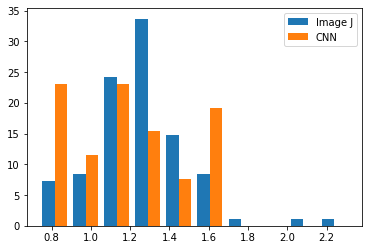

In [30]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

r_squared = 0.9179343488878418


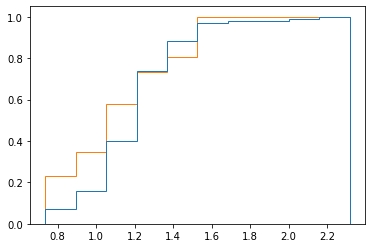

In [31]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
print('r_squared =',r2_score(Y1, Y2))

<a list of 2 Lists of Patches objects>
[0.73640011 0.89450402 1.05260793 1.21071183 1.36881574 1.52691965
 1.68502356 1.84312747 2.00123137 2.15933528 2.31743919]
[[ 7.36842105  8.42105263 24.21052632 33.68421053 14.73684211  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [23.07692308 11.53846154 23.07692308 15.38461538  7.69230769 19.23076923
   0.          0.          0.          0.        ]]


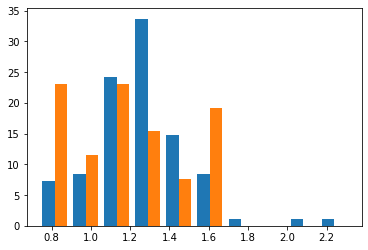

In [32]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [33]:
print(counts.sum())

200.00000000000006


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


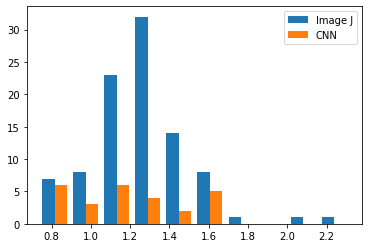

In [34]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [35]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1